In [18]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier , plot_tree

In [5]:
x , y = make_classification (n_features = 5 ,
                             n_redundant = 0 ,
                             n_informative = 5 ,
                             n_clusters_per_class = 1)

In [6]:
df = pd.DataFrame (x , columns = ['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.828222,-1.191472,-1.146422,-0.638183,1.071598,1
1,2.166634,-0.212856,-1.435531,0.827157,-0.493927,0
2,0.233106,-0.812969,1.698951,-1.024752,2.267589,0
3,-0.326866,0.983712,-0.120202,0.039902,-0.646801,1
4,-0.583742,0.797589,-2.521300,1.132651,-1.015719,1


In [26]:
df.sample(10 , replace = True) # row will repeat

,col1,col2,col3,col4,col5,target
78,-1.264731,-2.213102,0.750813,-1.873561,2.100631,1
32,0.066078,-0.141650,-0.523036,0.145005,1.930842,0
78,-1.264731,-2.213102,0.750813,-1.873561,2.100631,1
34,1.516834,-3.449329,-4.243798,4.670347,-0.043699,0
16,1.168815,-1.187407,4.872642,-2.905310,1.974787,1
2,0.233106,-0.812969,1.698951,-1.024752,2.267589,0
55,-2.471615,1.803849,-0.304938,-1.033808,-0.395366,1
74,0.411397,-0.600359,0.049444,-0.097609,1.486626,0
60,0.699904,1.387922,-0.072838,-0.278482,-0.577861,1
44,2.312258,-1.329103,-3.044314,2.654985,-0.708342,0


In [27]:
df.sample(10,replace = False) # row will NOT repeat

,col1,col2,col3,col4,col5,target
66,0.419783,-0.387558,0.348456,-0.438888,1.476813,0
86,1.652490,0.466170,-0.047787,-0.478509,0.099142,1
4,-0.583742,0.797589,-2.521300,1.132651,-1.015719,1
61,-1.050747,0.504008,-0.859466,-0.585597,0.044922,1
12,4.833687,-1.340980,3.008251,-0.237459,0.394032,1
59,4.001524,-1.706728,-1.931062,1.314216,0.346928,1
32,0.066078,-0.141650,-0.523036,0.145005,1.930842,0
50,-0.898149,1.697072,4.250130,-2.447820,0.159889,1
15,-0.902058,0.760115,0.431331,-1.334888,0.385998,1
72,0.912901,-1.440623,0.374787,0.100359,0.878040,0


In [7]:
# function for row sampling

def sample_rows(df , percent):
  return df.sample(int(percent * df.shape[0]) , replace = True)

In [10]:
# function for column / feature sampling

def sample_features(df , percent):
  # getting random X's columns name
  cols = random.sample (df.columns.tolist()[:-1] , int (percent * (df.shape[1] - 1 )))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [11]:
# function for combined sampling

def combine_sampling(df , row_percent , col_percent) :
  new_df = sample_rows(df , row_percent)
  return sample_features(new_df , col_percent)

# row sampling

In [13]:
df1 = sample_rows(df , 0.2)
df2 = sample_rows(df , 0.2)
df3 = sample_rows(df , 0.2)

print(df1.shape ,df2.shape , df3.shape)

(20, 6) (20, 6) (20, 6)


In [15]:
df1

,col1,col2,col3,col4,col5,target
27,2.269917,-0.509569,-0.680993,0.581784,-0.209661,0
98,-1.139129,-1.345866,0.833751,-2.061945,1.910401,1
44,2.312258,-1.329103,-3.044314,2.654985,-0.708342,0
81,-0.697394,-2.079911,-2.700729,2.980376,3.183474,0
6,-0.445497,1.024752,-0.807384,-0.295583,-0.136800,1
6,-0.445497,1.024752,-0.807384,-0.295583,-0.136800,1
22,0.663466,-2.396555,-1.136494,1.985641,1.634119,0
98,-1.139129,-1.345866,0.833751,-2.061945,1.910401,1
92,1.384192,-1.344463,0.966363,-0.451181,0.617721,1
29,0.683409,-3.141455,-4.056108,4.466867,1.178806,0


In [16]:
print(df1.columns , df2.columns , df3.columns , sep = '\n')

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')


In [17]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()


clf1.fit(df1.iloc[:,0:5] , df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5] , df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5] , df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.6, 0.875, 'x[3] <= 1.559\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.4, 0.625, 'x[0] <= 0.076\ngini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6, 0.375, 'x[1] <= -0.777\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

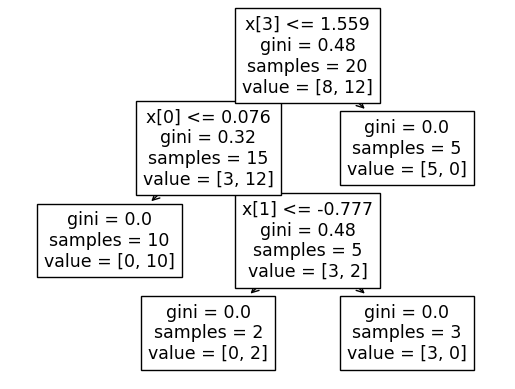

In [19]:
plot_tree(clf1)

[Text(0.4, 0.875, 'x[0] <= -0.1\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6, 0.625, 'x[3] <= -0.459\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.4, 0.375, 'x[1] <= 0.267\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]')]

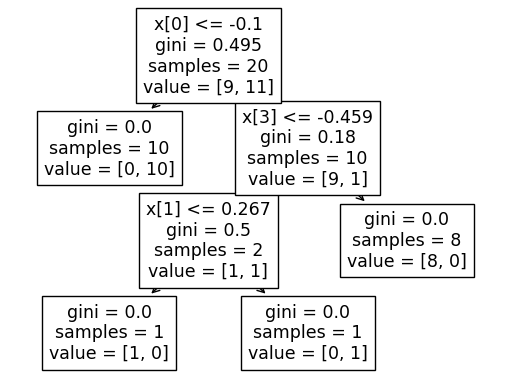

In [20]:
plot_tree(clf2)

[Text(0.3333333333333333, 0.9, 'x[3] <= -1.258\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.16666666666666666, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'x[1] <= -2.531\ngini = 0.43\nsamples = 16\nvalue = [11, 5]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.5, 'x[4] <= 0.587\ngini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(0.5, 0.3, 'x[3] <= 0.307\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.3, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]')]

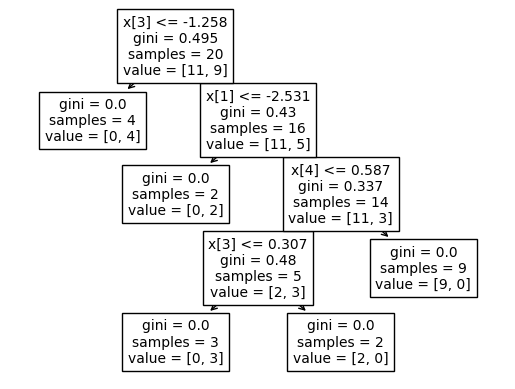

In [21]:
plot_tree(clf3)

for this input <p color = 'red'>[-0.326866,	0.983712,	-0.120202,	0.039902,	-0.646801] </p>  
<p color = 'green' > output will be 1  </p>

In [22]:
clf1.predict(np.array([-0.326866,	0.983712,	-0.120202,	0.039902,	-0.646801]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [23]:
clf2.predict(np.array([-0.326866,	0.983712,	-0.120202,	0.039902,	-0.646801]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [24]:
clf3.predict(np.array([-0.326866,	0.983712,	-0.120202,	0.039902,	-0.646801]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

<b color = 'pink' > majority count will be answer </b>

# feature sampling

In [42]:
df1 = sample_features(df , 0.4)
df2 = sample_features(df , 0.4)
df3 = sample_features(df , 0.4)

<ipython-input-10-9310b158f551>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
<ipython-input-10-9310b158f551>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
<ipython-input-10-9310b158f551>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [43]:
print(df1.shape ,df2.shape , df3.shape)

(100, 3) (100, 3) (100, 3)


In [44]:
df1

,col1,col5,target
0,-1.828222,1.071598,1
1,2.166634,-0.493927,0
2,0.233106,2.267589,0
3,-0.326866,-0.646801,1
4,-0.583742,-1.015719,1
...,...,...,...
95,0.666671,1.430827,0
96,3.092188,-2.025850,0
97,0.610573,1.088135,0
98,-1.139129,1.910401,1


In [45]:
print(df1.columns , df2.columns , df3.columns , sep = '\n')

Index(['col1', 'col5', 'target'], dtype='object')
Index(['col4', 'col5', 'target'], dtype='object')
Index(['col4', 'col3', 'target'], dtype='object')


In [47]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()


clf1.fit(df1.iloc[:,0:2] , df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2] , df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2] , df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.4074074074074074, 0.9583333333333334, 'x[0] <= -0.1\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.25925925925925924, 0.875, 'x[1] <= 2.218\ngini = 0.287\nsamples = 23\nvalue = [4, 19]'),
 Text(0.18518518518518517, 0.7916666666666666, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.3333333333333333, 0.7916666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5555555555555556, 0.875, 'x[0] <= 3.507\ngini = 0.481\nsamples = 77\nvalue = [46, 31]'),
 Text(0.48148148148148145, 0.7916666666666666, 'x[1] <= 2.279\ngini = 0.456\nsamples = 71\nvalue = [46, 25]'),
 Text(0.4074074074074074, 0.7083333333333334, 'x[1] <= -0.002\ngini = 0.438\nsamples = 68\nvalue = [46, 22]'),
 Text(0.18518518518518517, 0.625, 'x[0] <= 1.108\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.1111111111111111, 0.5416666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25925925925925924, 0.5416666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.62962

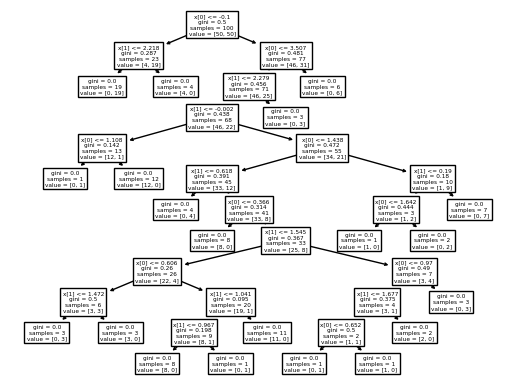

In [48]:
plot_tree(clf1)

[Text(0.5526315789473685, 0.95, 'x[0] <= 0.124\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.21052631578947367, 0.85, 'x[0] <= -1.185\ngini = 0.375\nsamples = 60\nvalue = [15, 45]'),
 Text(0.10526315789473684, 0.75, 'x[1] <= -0.2\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.05263157894736842, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.15789473684210525, 0.65, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(0.3157894736842105, 0.75, 'x[1] <= -1.084\ngini = 0.47\nsamples = 37\nvalue = [14, 23]'),
 Text(0.2631578947368421, 0.65, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3684210526315789, 0.65, 'x[1] <= 0.618\ngini = 0.451\nsamples = 35\nvalue = [12, 23]'),
 Text(0.2631578947368421, 0.55, 'x[0] <= -0.49\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(0.21052631578947367, 0.45, 'x[0] <= -0.582\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.15789473684210525, 0.35, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.26315789473684

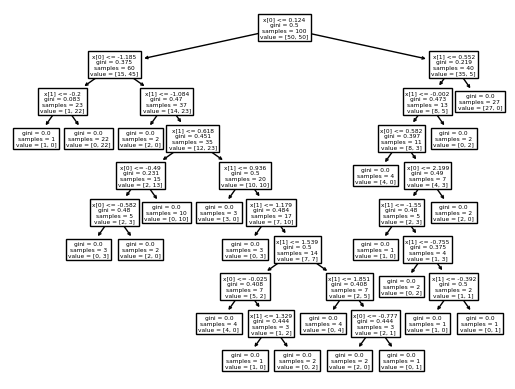

In [49]:
plot_tree(clf2)

[Text(0.5793269230769231, 0.95, 'x[0] <= 0.124\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.3125, 0.85, 'x[0] <= -1.185\ngini = 0.375\nsamples = 60\nvalue = [15, 45]'),
 Text(0.21153846153846154, 0.75, 'x[1] <= 0.939\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.17307692307692307, 0.65, 'x[1] <= 0.869\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.1346153846153846, 0.55, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.21153846153846154, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.65, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.41346153846153844, 0.75, 'x[1] <= -0.556\ngini = 0.47\nsamples = 37\nvalue = [14, 23]'),
 Text(0.375, 0.65, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.4519230769230769, 0.65, 'x[1] <= 0.778\ngini = 0.499\nsamples = 29\nvalue = [14, 15]'),
 Text(0.28846153846153844, 0.55, 'x[1] <= 0.094\ngini = 0.49\nsamples = 21\nvalue = [12, 9]'),
 Text(0.15384615384615385, 0.45, 'x[1] <= -0.435\ngini = 0.473

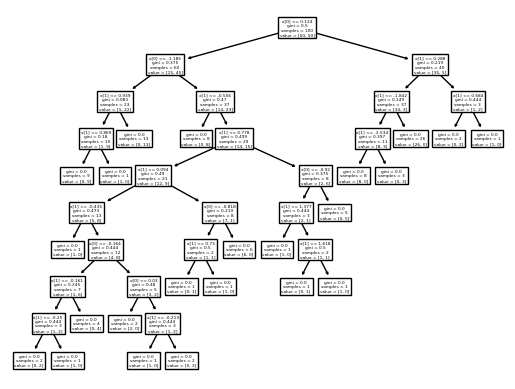

In [51]:
plot_tree(clf3)

for this input <p color = 'red'>[-0.326866,	-0.646801	  ] </p>  
<p color = 'green' > output will be 1  </p>

In [36]:
print(clf1.predict(np.array([-0.326866,	-0.646801	  ]).reshape(1,2)) )

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [53]:
print(clf2.predict(np.array([-0.326866,	-0.646801	]).reshape(1,2)))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [54]:
print(clf3.predict(np.array([-0.326866,	-0.646801	]).reshape(1,2)))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<b color = 'pink' > majority count will be answer </b>

# combine sampling

In [55]:
df1 = combine_sampling(df , 0.2 , 0.4)
df2 = combine_sampling(df , 0.2 , 0.4)
df3 = combine_sampling(df , 0.2 , 0.4)

print(df1.shape ,df2.shape , df3.shape)

(20, 3) (20, 3) (20, 3)


<ipython-input-10-9310b158f551>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
<ipython-input-10-9310b158f551>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
<ipython-input-10-9310b158f551>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [56]:
df1

,col3,col1,target
1,-1.435531,2.166634,0
59,-1.931062,4.001524,1
43,0.335081,2.179270,1
54,-0.339020,0.766867,0
51,-0.017098,2.177865,1
80,0.357440,3.142959,0
61,-0.859466,-1.050747,1
32,-0.523036,0.066078,0
41,-1.377411,0.368778,1
93,0.577265,0.292160,1


In [57]:
print(df1.columns , df2.columns , df3.columns , sep = '\n')

Index(['col3', 'col1', 'target'], dtype='object')
Index(['col4', 'col1', 'target'], dtype='object')
Index(['col3', 'col4', 'target'], dtype='object')


In [62]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()


clf1.fit(df1.iloc[:,0:2] , df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2] , df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2] , df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.4, 0.9, 'x[1] <= 0.583\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.2, 0.7, 'x[0] <= -0.665\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.3, 0.5, 'x[1] <= 0.179\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.7, 'x[1] <= 2.172\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.7, 0.5, 'x[1] <= 2.661\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.3, 'x[0] <= -0.992\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

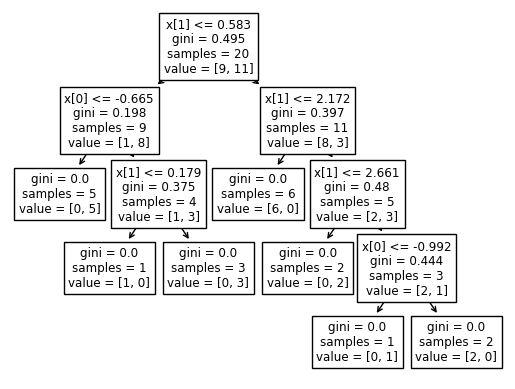

In [63]:
plot_tree(clf1)

[Text(0.375, 0.9, 'x[1] <= -0.096\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.16666666666666666, 0.7, 'x[0] <= 2.056\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5833333333333334, 0.7, 'x[1] <= 1.531\ngini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(0.4166666666666667, 0.5, 'x[1] <= 0.633\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5, 0.3, 'x[1] <= 1.009\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.4166666666666667, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5833333333333334, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.5, 'x[1] <= 2.79\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8333333333333334, 0.3, 'x[1] <= 4.118\ngin

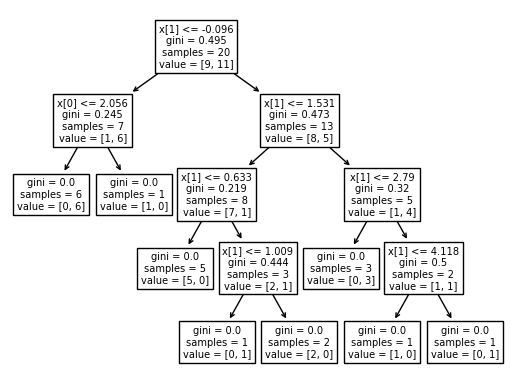

In [64]:
plot_tree(clf2)

[Text(0.6666666666666666, 0.875, 'x[1] <= -0.716\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.5, 0.625, 'x[1] <= -1.111\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.3333333333333333, 0.375, 'x[1] <= -1.185\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]')]

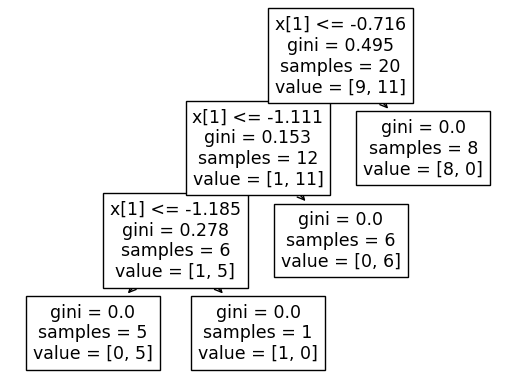

In [65]:
plot_tree(clf3)

for this input <p color = 'red'>[-1.931062,	4.001524] </p>  
<p color = 'green' > output will be 1  </p>

In [70]:
clf1.predict(np.array([-1.349375,	-0.439319	]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [71]:
clf2.predict(np.array([-1.349375,	-0.439319	]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [72]:
clf3.predict(np.array([-1.349375,	-0.439319	]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

<b color = 'pink' > majority count will be answer </b>